In [4]:
# import libraries
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
source_path = r"src\data"
path_LB = os.path.join(source_path, "LocalBusines")
path_restaurant = os.path.join(source_path, "Restaurant")
path_hotel = os.path.join(source_path, "Hotel")

source_path = r"C:\Users\chench10\Downloads" 

In [8]:
# import data
file_LB = "Matching_Files_LB_min3_top100"
file_restaurant = "matchingRestaurant"
file_hotel = "matchingHotels"

#df_LB =  pd.read_json(os.path.join(source_path, file_LB), compression='gzip', lines=True).append()
df_restaurant = pd.read_json(os.path.join(source_path, file_restaurant), compression='gzip', lines=True)
#df_hotel =  pd.read_json(os.path.join(source_path, file_hotel), compression='gzip', lines=True)

ValueError: Expected object or value

In [ ]:
df_restaurant

In [54]:
class EntityCluster():
    """
    create culsters and generate summary statistics for each entity tpye
    """
    
    def __init__(self, name, df=None, id_col='telephoneNorm'):
        self.name = name
        self.df = df
        self.id_col = id_col
        
        self._create_clusters()
        
    @staticmethod
    def _helperfunc(iterator, cluster, id_col='telephoneNorm', val_col='MatchingGeoPoints'):
        key = iterator[id_col]
        val = iterator[val_col]
        cluster[key] = cluster[key].union(set(val))
        
        return cluster
        
        
    def _create_clusters(self):
        """
        create clusters and use the column value as the cluster identifier
        """
        df = self.df
        id_col = self.id_col
        
        # intialize the cluster
        if not df is None:
            cluster_ids = df[id_col].unique()
            cluster = {key: set([]) for key in cluster_ids}
            # add elements to the cluster
            cluster = df.apply(EntityCluster._helperfunc, args=(cluster,), axis=1)[0]
        else:
            cluster = None
        
        self.cluster = cluster
        
    
    def get_cluster(self):
        return self.cluster
                                                                            

    def create_cluster_statistics(self, *args):
        cluster = self.cluster
        # create a dataframe for data storage
        tmp = {}
        for key, val in cluster.items():
            tmp[key] = len(val)
            
        df_clusters = pd.DataFrame().from_dict(tmp, orient='index', columns=['frequency'])
        df_clusters.sort_values('frequency', ascending=False, inplace=True)
            
        return df_clusters['frequency'].describe()
      
    
    def plot_histogram(self, min_=None, max_=None, bins=None, *args): 
    
        cluster = self.cluster
        name =self.name
        # create a dataframe for data storage
        tmp = {}
        for key, val in cluster.items():
            tmp[key] = len(val)
            
        df_clusters = pd.DataFrame().from_dict(tmp, orient='index', columns=['frequency'])
        df_clusters.sort_values('frequency', ascending=False, inplace=True)
        
        # plot the histogram
        if min_ is None: 
            min_ = df_clusters.frequency.quantile(0.95) 
        if max_ is None: 
            max_ = df_clusters.frequency.max()
        if bins is None:
            bins = int((max_ - min_)/10)
            
        figure, ax= plt.subplots(figsize=(15,3))
        subset = df_clusters[(df_clusters.frequency> min_)&(df_clusters.frequency< max_)].frequency
        plt.title(name)
        plt.xlabel('Cluster Size')
        plt.hist(subset, bins=bins)

### Cluster Size

<b> Local Business

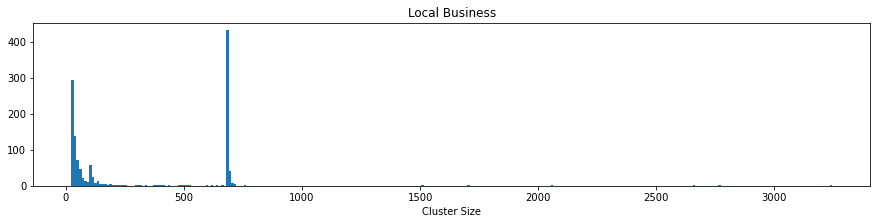

In [55]:
LocalBusiness = EntityCluster('Local Business', df_LB)
cluster_statistics_LB = LocalBusiness.create_cluster_statistics()
cluster_plot_LB = LocalBusiness.plot_histogram(bins=300)

In [56]:
cluster_statistics_LB

count    25283.000000
mean        19.768105
std        129.693140
min          2.000000
25%          2.000000
50%          2.000000
75%          4.000000
max      12704.000000
Name: frequency, dtype: float64

<b> Restaurants

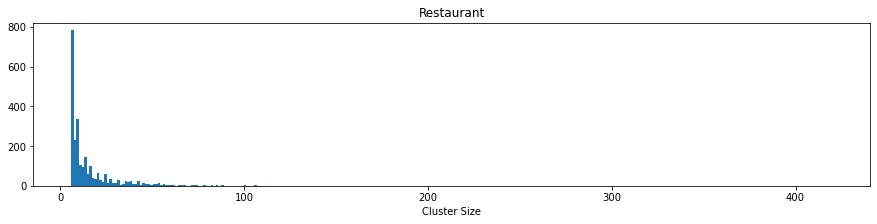

In [57]:
Restaurant = EntityCluster('Restaurant', df_restaurant)
cluster_statistics_restaurant = Restaurant.create_cluster_statistics()
cluster_plot_restaurant = Restaurant.plot_histogram(min_=5, max_=2000, bins=300)

In [58]:
cluster_statistics_restaurant

count    10919.000000
mean         5.908142
std         22.475630
min          2.000000
25%          2.000000
50%          3.000000
75%          5.000000
max       2032.000000
Name: frequency, dtype: float64

<b>Hotels

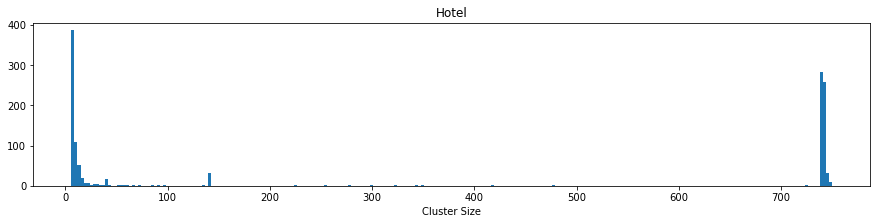

In [59]:
Hotel = EntityCluster('Hotel', df_hotel)
cluster_statistics_hotel = Hotel.create_cluster_statistics()
cluster_plot_hotel = Hotel.plot_histogram(min_=5, max_=2000, bins=250)

In [60]:
cluster_statistics_hotel

count    6993.000000
mean       67.527385
std       215.552493
min         2.000000
25%         2.000000
50%         3.000000
75%         4.000000
max      5183.000000
Name: frequency, dtype: float64

<b> all catergories

In [61]:
classes = [LocalBusiness, Restaurant, Hotel]

cluster_all = {}
for c in classes:
    cluster_all.update(c.get_cluster())

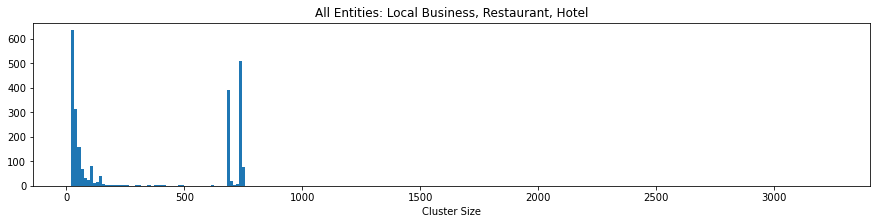

In [62]:
AllCategories = EntityCluster('All Entities: Local Business, Restaurant, Hotel')
AllCategories.cluster = cluster_all
cluster_statistics_all = AllCategories.create_cluster_statistics()
cluster_plot_all = AllCategories.plot_histogram(min_=20, max_=5000, bins=250)

In [63]:
cluster_statistics_all

count    42606.000000
mean        23.201497
std        132.123146
min          2.000000
25%          2.000000
50%          2.000000
75%          4.000000
max      12704.000000
Name: frequency, dtype: float64